In [120]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:
data=pd.read_excel('CILdatav2.xlsx')

In [127]:
print(data)

       DrugUse  Employment_status  Family_income  City_or_Village  \
0            0                  1              0                0   
1            1                  1              0                1   
2            0                  1              1                1   
3            0                  1              0                1   
4            0                  9              0                1   
...        ...                ...            ...              ...   
32888        0                  1              0                1   
32889        0                  1              0                1   
32890        0                  9              0                1   
32891        0                  1              0                1   
32892        1                  1              0                1   

       Hopelessness(DSTHOP00)  Restlessness(DSTRST00)  Depressed(DSTCHR00)  \
0                           0                       0                    0   
1              

In [128]:
data.head()

,DrugUse,Employment_status,Family_income,City_or_Village,Hopelessness(DSTHOP00),Restlessness(DSTRST00),Depressed(DSTCHR00),Everything_effort(DSTEFF00),Not_feeling_good00days(DSTNGD00),Psych Distress(SPDMON),Major_depressive_epi_lifetime(AMDELT),Self Percived mental helath prob(CAMHPROB),SUICTHNK(Sucidal Thoughts),Unnamed: 13,MentalssueFinal
0,0,1,0,0,0,0,0,0,0,0.0,0.0,0,0,NaN,0
1,1,1,0,1,0,0,0,0,0,0.0,0.0,0,0,NaN,0
2,0,1,1,1,0,0,0,0,0,0.0,0.0,0,0,NaN,0
3,0,1,0,1,0,0,0,0,0,0.0,0.0,0,0,NaN,0
4,0,9,0,1,99,99,99,99,99,NaN,NaN,99,99,NaN,0


In [129]:
causal_graph = """digraph {
Age;
City_or_Village;
DrugUse;
Employment_status;
Family_income;
MentalssueFinal;
Age -> DrugUse;
Employment_status -> Age;
Employment_status -> DrugUse;
Employment_status -> Family_income;
Family_income -> Age;
Family_income -> City_or_Village;
Family_income -> DrugUse;
Family_income -> MentalssueFinal;
MentalssueFinal -> Age;
MentalssueFinal -> DrugUse;
}"""


In [130]:
model=CausalModel(
        data = data,
        graph=causal_graph,
        treatment="MentalssueFinal",
        outcome="DrugUse")

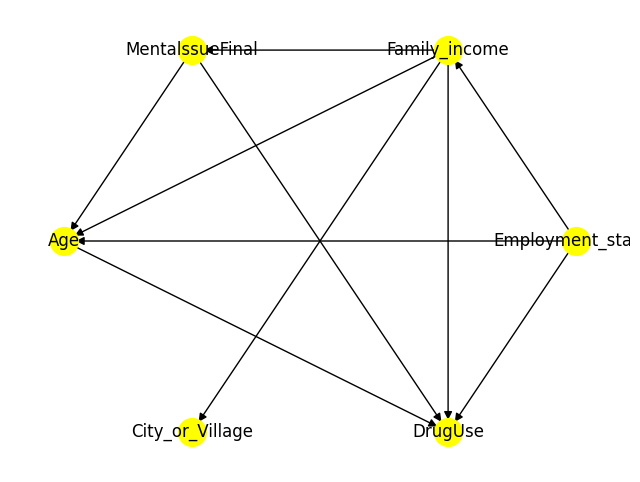

In [131]:
model.view_model()

In [132]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                   
──────────────────(E[DrugUse|Family_income])
d[MentalssueFinal]                          
Estimand assumption 1, Unconfoundedness: If U→{MentalssueFinal} and U→DrugUse then P(DrugUse|MentalssueFinal,Family_income,U) = P(DrugUse|MentalssueFinal,Family_income)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [137]:
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "att")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

propensity_score_stratification
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                   
──────────────────(E[DrugUse|Family_income])
d[MentalssueFinal]                          
Estimand assumption 1, Unconfoundedness: If U→{MentalssueFinal} and U→DrugUse then P(DrugUse|MentalssueFinal,Family_income,U) = P(DrugUse|MentalssueFinal,Family_income)

## Realized estimand
b: DrugUse~MentalssueFinal+Family_income
Target units: att

## Estimate
Mean value: 0.13534894904591982

Causal Estimate is 0.13534894904591982


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
refutation = model.refute_estimate(identified_estimand, 
                                   causal_estimate_att,
                                   method_name="placebo_treatment_refuter",
                                   placebo_type="permute", num_simulations=20)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [139]:
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.13534894904591982
New effect:-0.0008675273709155138
p value:0.3950842323812336



In [140]:
res_random=model.refute_estimate(identified_estimand,causal_estimate_att, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Refute: Add a random common cause
Estimated effect:0.13534894904591982
New effect:0.139909582426466
p value:0.04

